### 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

#### 입력 이미지는 깊이 차원이 존재해야함 (흑백이미지의 경우 깊이 차원이 없지만 추가해볼 것)

In [2]:
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

### 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', 
                              padding ='same', input_shape= (28,28,1)))

가장 큰 값을 추출하여 특성 맵의 크기를 1/2 로 줄임

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',
                             padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

### 마지막으로 3차원을 1열로 펼져 10개의 뉴런을 가진 출력층 확률 계산하기

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

### 층의 구성을 그림으로 표현해주는 plot_model()

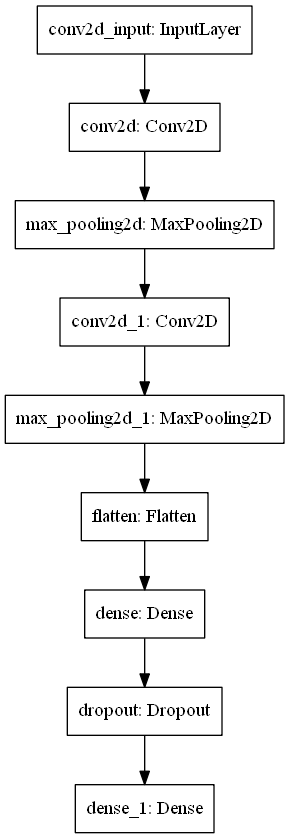

In [8]:
keras.utils.plot_model(model)

#### to_file로 이미지 저장, show_shapes = True로 shape 출력, 해상도 dpi

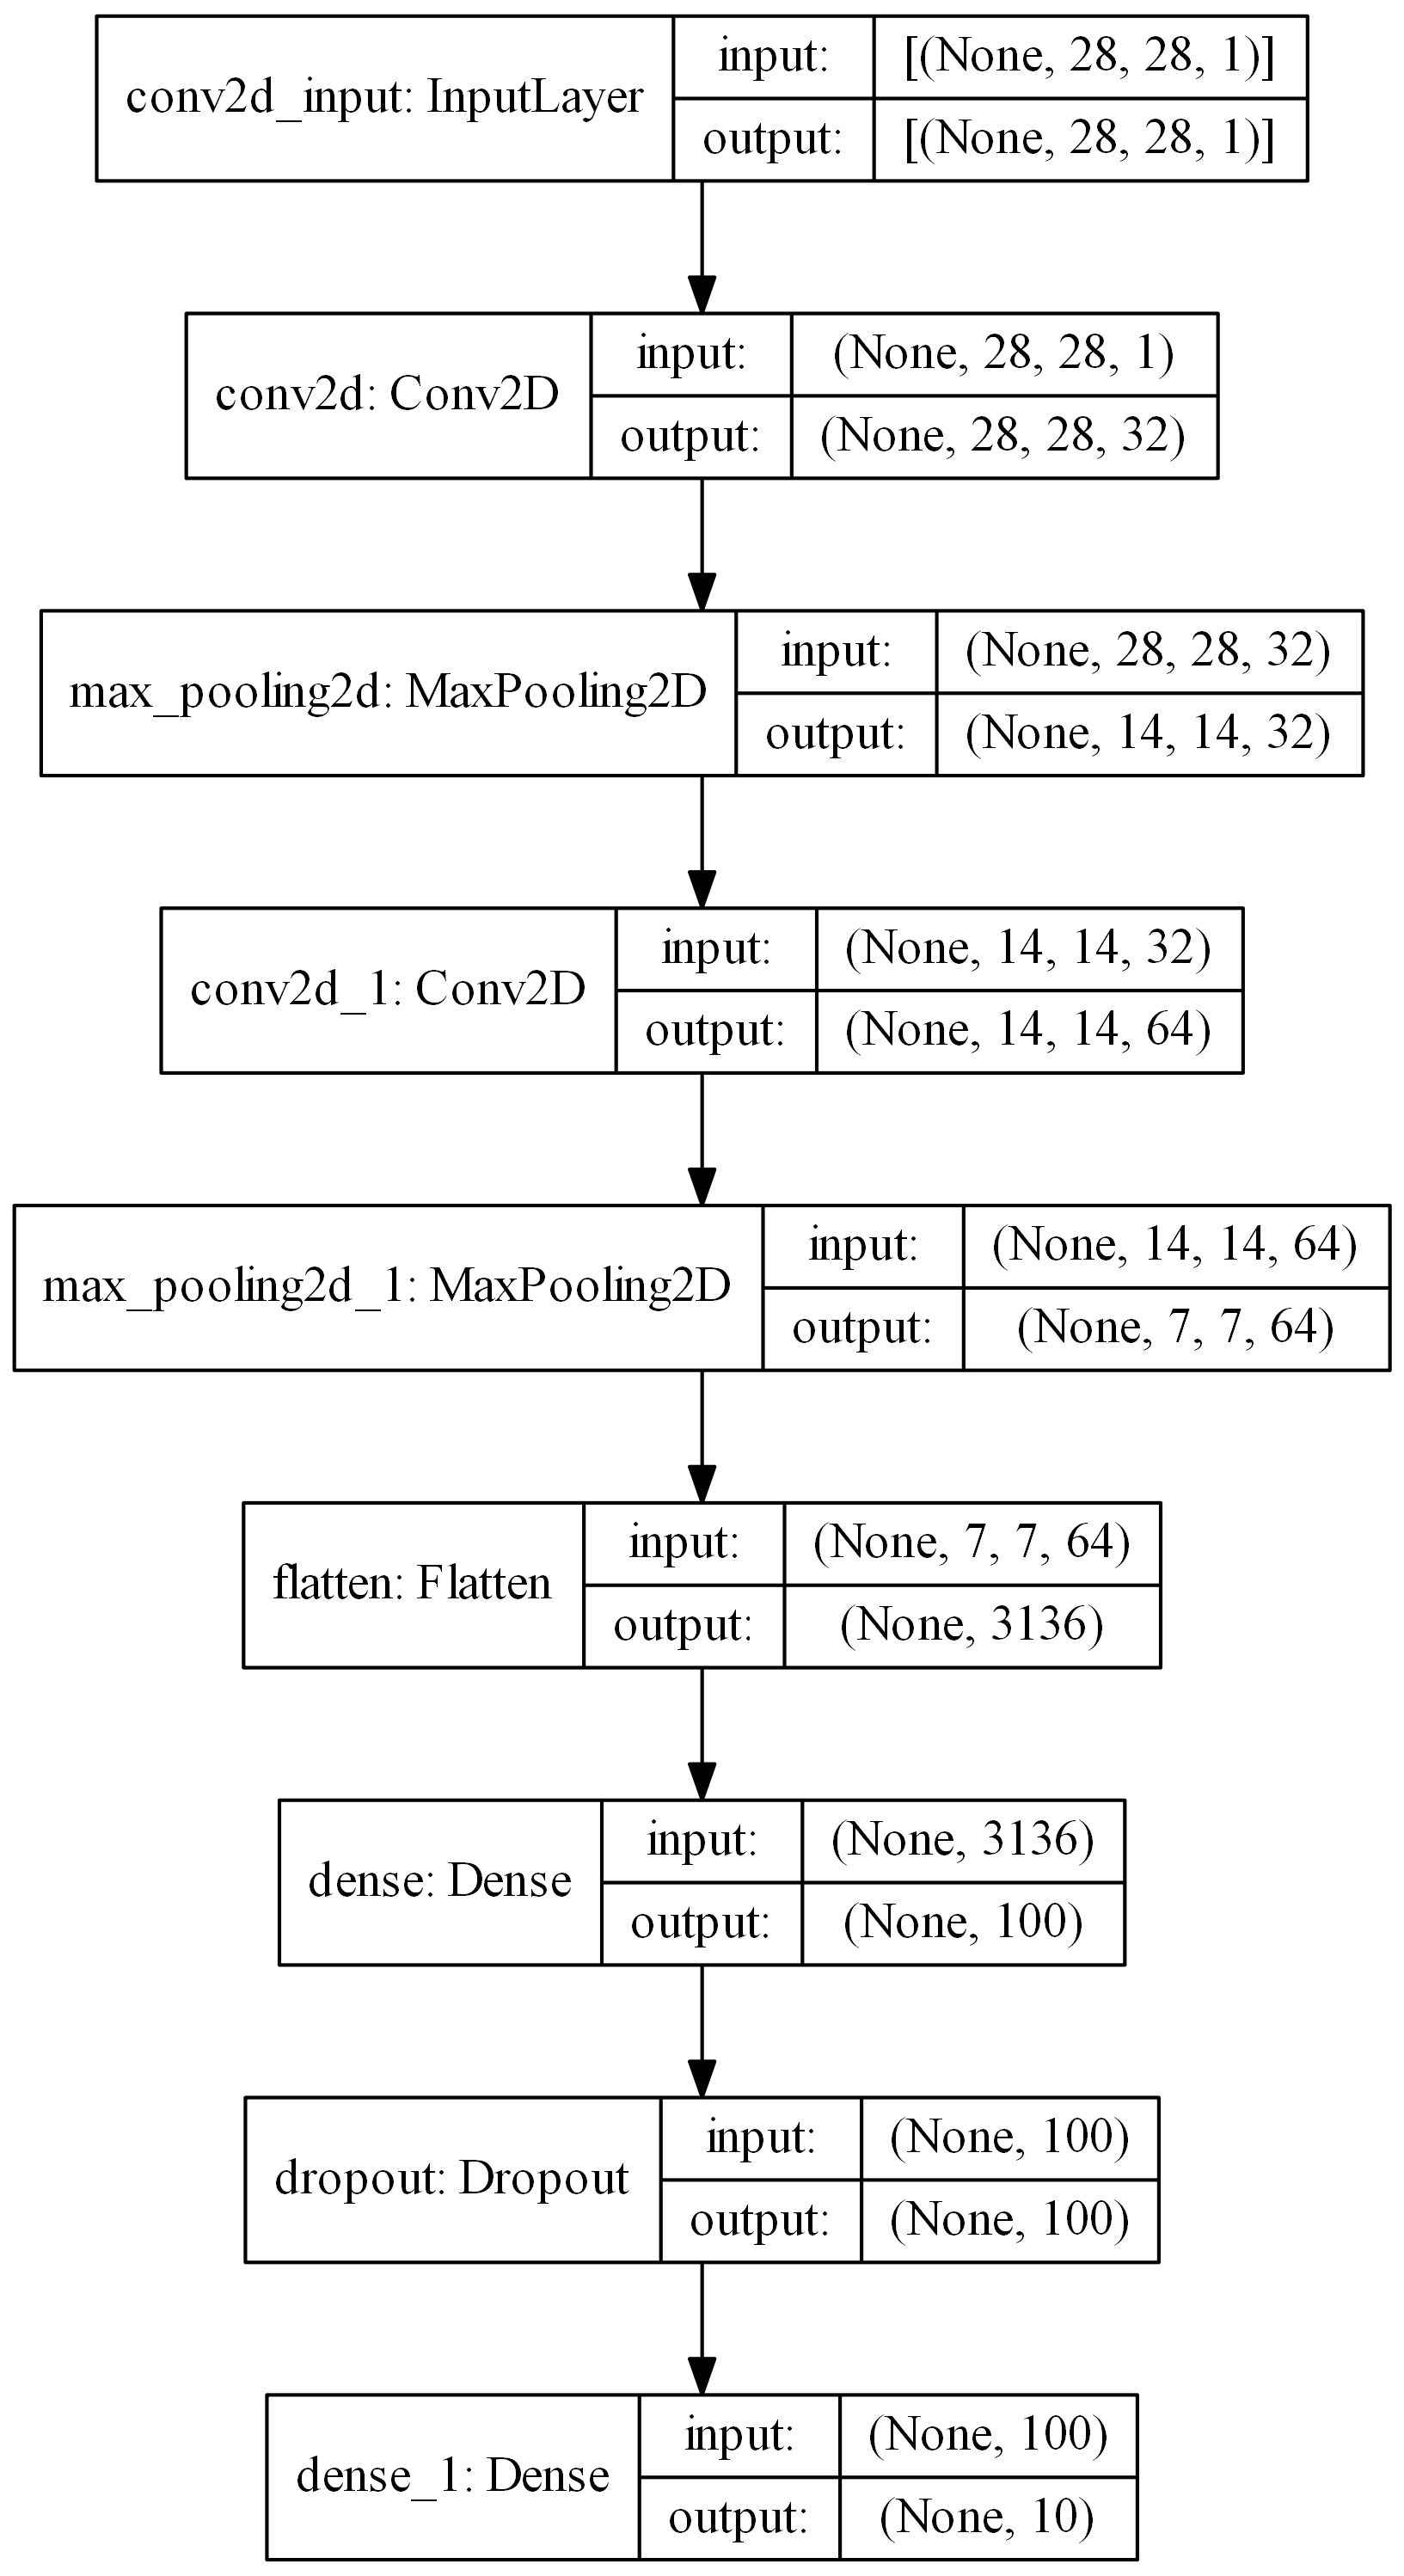

In [9]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn-architecture.png', dpi = 300)

### 모델 컴파일과 훈련

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience =2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5190 - accuracy: 0.8125 - val_loss: 0.3329 - val_accuracy: 0.8760
Epoch 2/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3479 - accuracy: 0.8744 - val_loss: 0.2867 - val_accuracy: 0.8957
Epoch 3/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3010 - accuracy: 0.8914 - val_loss: 0.2645 - val_accuracy: 0.9007
Epoch 4/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2714 - accuracy: 0.9026 - val_loss: 0.2608 - val_accuracy: 0.9043
Epoch 5/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2443 - accuracy: 0.9109 - val_loss: 0.2342 - val_accuracy: 0.9130
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2262 - accuracy: 0.9165 - val_loss: 0.2304 - val_accuracy: 0.9149
Epoch 7/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2107 - accuracy: 0.9220 - val_loss: 0.2306 -

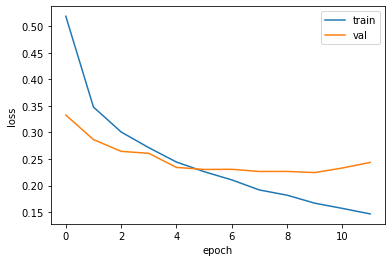

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2245 - accuracy: 0.9235


[0.22451151907444, 0.9235000014305115]

흑백 사진은 3차원 RGB 차원이 없어서 (28,28,1) 을 (28,28)로 원상 복귀

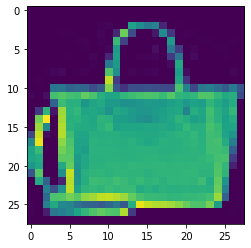

In [13]:
plt.imshow(val_scaled[0].reshape(28,28))

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.0703416e-21 4.2275987e-32 3.3968258e-26 2.9514558e-22 1.7828002e-24
  2.8829687e-19 2.0519221e-22 7.2432281e-25 1.0000000e+00 9.2658245e-24]]


In [16]:
import numpy as np

print(np.argmax(preds))

8


In [17]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [18]:
print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled =  test_input.reshape(-1,28,28,1)/255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2504 - accuracy: 0.9138


[0.2503831684589386, 0.9138000011444092]

## 합성곱 신경망의 시각화

In [66]:
model = keras.models.load_model('best-cnn-model.h5')

케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다

In [67]:
model.layers

#### 층의 가중치 조사 / 층의 가중치와 절편은 층의 weights 속성에 저장 (리스트 형태)

In [68]:
conv = model.layers[0] #가중치 
print(conv.weights[0].shape, conv.weights[1].shape) #절편의 개수

(3, 3, 1, 32) (32,)


가중치들의 평균과 표준편차

In [69]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0040977364 0.2354544


### 가중치 분포 확인

hist 메서드는 1차원 배열을 전달 받아야하기 때문에 reshape 작업을 해준다

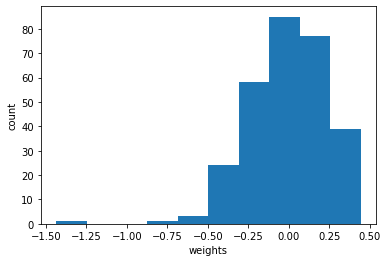

In [70]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

### 32개의 커널을 16개씩 출력하기

i*16+j : 0~32 까지의 숫자

v_min, v_max 로 맷플롯립의 컬러맵으로 표현할 범위를 지정

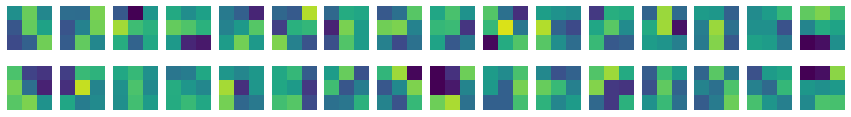

In [71]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

### 훈련하지 않은 빈 합성곱 신경망을 만들기

#### 위의 훈련된 가중치와 어떻게 다른지 보자

In [72]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size =3, 
             activation = 'relu',padding = 'same', input_shape=(28,28,1)))

이 모델의 첫번째 층의 가중치를 변수에 저장

In [73]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [74]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0016058758 0.08318045


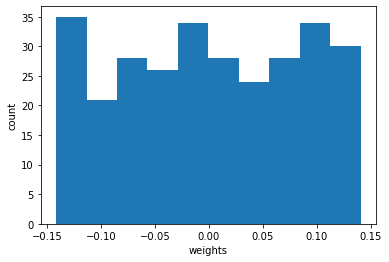

In [75]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

#### 밋밋하게 초기화된 가중치 값

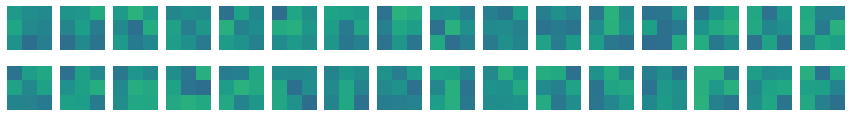

In [76]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

# 여기서부터 길을 잃음

## 함수형 API

여태 신경망 모델을 만들 때 Seqential 클래스를 사용했다. 이 클래스는 층을 차례대로 쌓은 모델을 만든다. 딥러닝에는 좀 더 복잡한 모델들이 존재한다. 예를들어 입력이 2개일 수도 있고 출력이 2개일 수도 있음  --> 이런 경우 함수형 api사용!!

### Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현해보기

In [77]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [78]:
inputs = keras.Input(shape = (28, 28, 1))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

### 우리가 알고 싶은 것은 Conv2D 층이 출력한 특성맵

따라서 model 객체의 입력과 Conv2D의 출력을 알아야함!!

In [79]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")


#### model.input과 model.layers[0].output 을 연결하는 새로운 conv_acti 모델 만들수 있다

In [80]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### 특성 맵 시각화

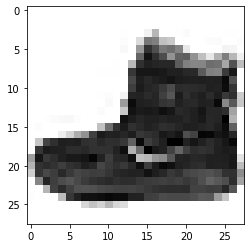

In [81]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [82]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [83]:
print(feature_maps.shape)

(1, 28, 28, 1)


IndexError: index 2 is out of bounds for axis 0 with size 2

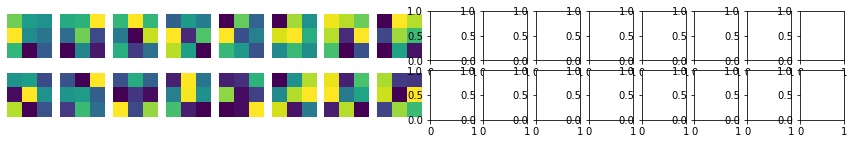

In [84]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(no_training_weights[:,:,0,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [86]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [87]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [89]:
print(feature_maps.shape)

(1, 28, 28, 10)


In [ ]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(no_training_weights[:,:,0,i*8+j])
        axs[i,j].axis('off')
plt.show()